### Assignment 6 - Linear Regressions on Iris Dataset

In [299]:
import matplotlib.pyplot as pl
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [300]:
iris = datasets.load_iris()

#### pairs() code via Everaldo

In [301]:
# For this assignment, I'm choosing ggplot
matplotlib.style.use('ggplot')

# (c) 2014 Reid Johnson
#
# Functions to work with continuous data and linear regression models.

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
            i += 1

    pl.show()

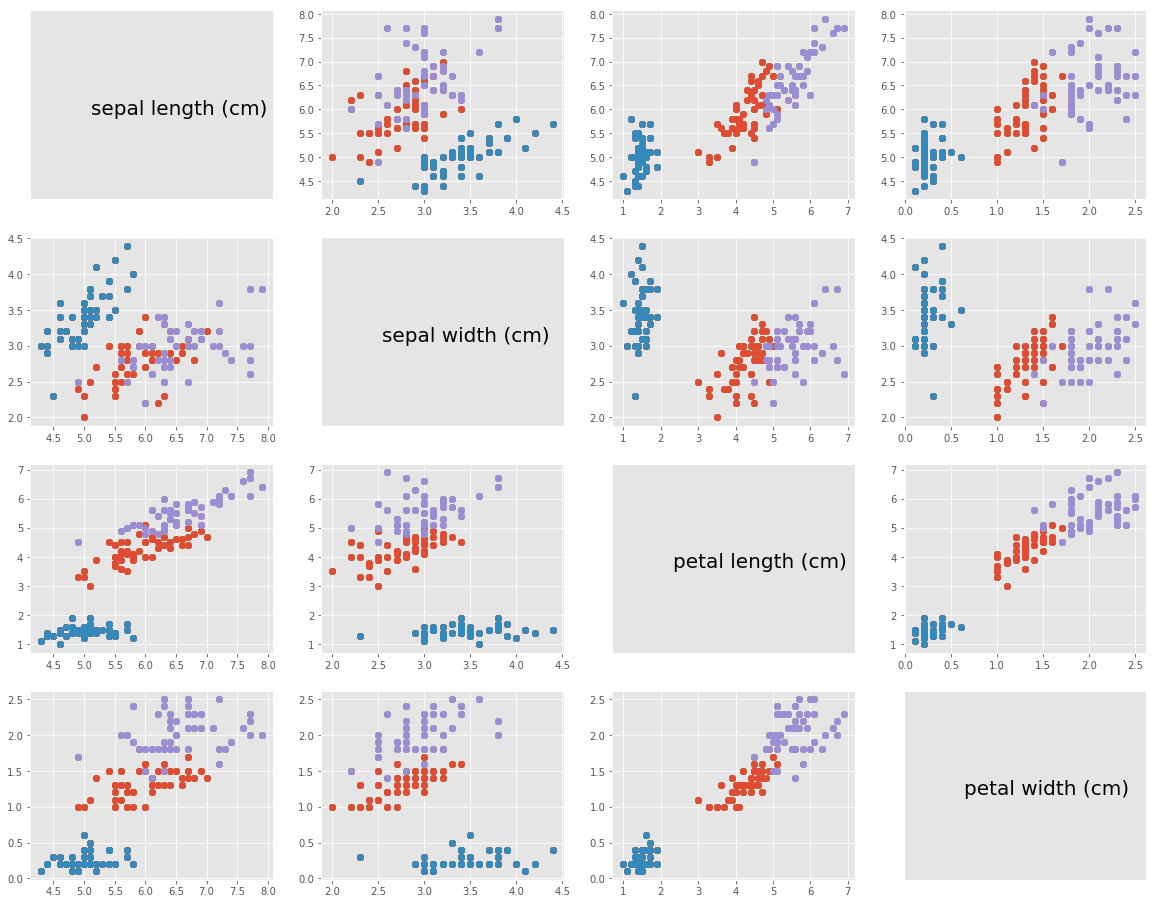

In [302]:
pairs(df)

In [303]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [304]:
# Add class to the dataframe

df['class'] = data.target

# Remap numeric class to word labels
label_map = {
    0: 'Setosa',
    1: 'Versicolour',
    2: 'Virginica'
}

df['class'] = df['class'].map(label_map)

In [305]:
# Shuffle the ordered dataset
df = df.sample(frac=1).reset_index(drop=True)

#### Setup all the data we need
##### 1. Setup training and test sets

In [306]:
# Sepal Length (Independent), Sepal Width (Dependent)
X_train_sep_l_sep_w = df['sepal length (cm)'][:100].values.reshape(100,1)
y_train_sep_l_sep_w = df['sepal width (cm)'][:100]

X_test_sep_l_sep_w = df['sepal length (cm)'][100:].values.reshape(50,1)
y_test_sep_l_sep_w = df['sepal width (cm)'][100:]

# Sepal Length (Independent), Petal Length (Dependent)
X_train_sep_l_pet_l = df['sepal length (cm)'][:100].values.reshape(100,1)
y_train_sep_l_pet_l = df['petal length (cm)'][:100]

X_test_sep_l_pet_l = df['sepal length (cm)'][100:].values.reshape(50,1)
y_test_sep_l_pet_l = df['petal length (cm)'][100:]

# Sepal Length (Independent), Petal Width (Dependent)
X_train_sep_l_pet_w = df['sepal length (cm)'][:100].values.reshape(100,1)
y_train_sep_l_pet_w = df['petal width (cm)'][:100]

X_test_sep_l_pet_w = df['sepal length (cm)'][100:].values.reshape(50,1)
y_test_sep_l_pet_w = df['petal width (cm)'][100:]

# Sepal Width (Independent), Sepal Length (Dependent)
X_train_sep_w_sep_l = df['sepal width (cm)'][:100].values.reshape(100,1)
y_train_sep_w_sep_l = df['sepal length (cm)'][:100]

X_test_sep_w_sep_l = df['sepal width (cm)'][100:].values.reshape(50,1)
y_test_sep_w_sep_l = df['sepal length (cm)'][100:]

# Sepal Width (Independent), Petal Length (Dependent)
X_train_sep_w_pet_l = df['sepal width (cm)'][:100].values.reshape(100,1)
y_train_sep_w_pet_l = df['petal length (cm)'][:100]

X_test_sep_w_pet_l = df['sepal width (cm)'][100:].values.reshape(50,1)
y_test_sep_w_pet_l = df['petal length (cm)'][100:]

# Sepal Width (Independent), Petal Width (Dependent)
X_train_sep_w_pet_w = df['sepal width (cm)'][:100].values.reshape(100,1)
y_train_sep_w_pet_w = df['petal width (cm)'][:100]

X_test_sep_w_pet_w = df['sepal width (cm)'][100:].values.reshape(50,1)
y_test_sep_w_pet_w = df['petal width (cm)'][100:]

# Petal Length (Independent), Sepal Length (Dependent)
X_train_pet_l_sep_l = df['petal length (cm)'][:100].values.reshape(100,1)
y_train_pet_l_sep_l = df['sepal length (cm)'][:100]

X_test_pet_l_sep_l = df['petal length (cm)'][100:].values.reshape(50,1)
y_test_pet_l_sep_l = df['sepal length (cm)'][100:]

# Petal Length (Independent), Sepal Width (Dependent)
X_train_pet_l_sep_w = df['petal length (cm)'][:100].values.reshape(100,1)
y_train_pet_l_sep_w = df['sepal width (cm)'][:100]

X_test_pet_l_sep_w = df['petal length (cm)'][100:].values.reshape(50,1)
y_test_pet_l_sep_w = df['sepal width (cm)'][100:]

# Petal Length (Independent), Petal Width (Dependent)
X_train_pet_l_pet_w = df['petal length (cm)'][:100].values.reshape(100,1)
y_train_pet_l_pet_w = df['petal width (cm)'][:100]

X_test_pet_l_pet_w = df['petal length (cm)'][100:].values.reshape(50,1)
y_test_pet_l_pet_w = df['petal width (cm)'][100:]

# Petal Width (Independent), Sepal Length (Dependent)
X_train_pet_w_sep_l = df['petal width (cm)'][:100].values.reshape(100,1)
y_train_pet_w_sep_l = df['sepal length (cm)'][:100]

X_test_pet_w_sep_l = df['petal width (cm)'][100:].values.reshape(50,1)
y_test_pet_w_sep_l = df['sepal length (cm)'][100:]

# Petal Width (Independent), Sepal Width (Dependent)
X_train_pet_w_sep_w = df['petal width (cm)'][:100].values.reshape(100,1)
y_train_pet_w_sep_w = df['sepal width (cm)'][:100]

X_test_pet_w_sep_w = df['petal width (cm)'][100:].values.reshape(50,1)
y_test_pet_w_sep_w = df['sepal width (cm)'][100:]

# Petal Width (Independent), Petal Length (Dependent)
X_train_pet_w_pet_l = df['petal width (cm)'][:100].values.reshape(100,1)
y_train_pet_w_pet_l = df['petal length (cm)'][:100]

X_test_pet_w_pet_l = df['petal width (cm)'][100:].values.reshape(50,1)
y_test_pet_w_pet_l = df['petal length (cm)'][100:]

##### 2. Setup linear regression objects for each feature combination

In [307]:
regr_slsw = linear_model.LinearRegression()
regr_slpl = linear_model.LinearRegression()
regr_slpw = linear_model.LinearRegression()

regr_swsl = linear_model.LinearRegression()
regr_swpl = linear_model.LinearRegression()
regr_swpw = linear_model.LinearRegression()

regr_plsl = linear_model.LinearRegression()
regr_plsw = linear_model.LinearRegression()
regr_plpw = linear_model.LinearRegression()

regr_pwsl = linear_model.LinearRegression()
regr_pwsw = linear_model.LinearRegression()
regr_pwpl = linear_model.LinearRegression()

##### 3. Do the fits

In [308]:
regr_slsw.fit(X_train_sep_l_sep_w, y_train_sep_l_sep_w)
regr_slpl.fit(X_train_sep_l_pet_l, y_train_sep_l_pet_l)
regr_slpw.fit(X_train_sep_l_pet_w, y_train_sep_l_pet_w)

regr_swsl.fit(X_train_sep_w_sep_l, y_train_sep_w_sep_l)
regr_swpl.fit(X_train_sep_w_pet_l, y_train_sep_w_pet_l)
regr_swpw.fit(X_train_sep_w_pet_w, y_train_sep_w_pet_w)

regr_plsl.fit(X_train_pet_l_sep_l, y_train_pet_l_sep_l)
regr_plsw.fit(X_train_pet_l_sep_w, y_train_pet_l_sep_w)
regr_plpw.fit(X_train_pet_l_pet_w, y_train_pet_l_pet_w)

regr_pwsl.fit(X_train_pet_w_sep_l, y_train_pet_w_sep_l)
regr_pwsw.fit(X_train_pet_w_sep_w, y_train_pet_w_sep_w)
regr_pwpl.fit(X_train_pet_w_pet_l, y_train_pet_w_pet_l)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### 4. Setup prediction data by feeding in test sets

In [309]:
pred_slsw = regr_slsw.predict(X_test_sep_l_sep_w)
pred_slpl = regr_slpl.predict(X_test_sep_l_pet_l)
pred_slpw = regr_slpw.predict(X_test_sep_l_pet_w)

pred_swsl = regr_swsl.predict(X_test_sep_w_sep_l)
pred_swpl = regr_swpl.predict(X_test_sep_w_pet_l)
pred_swpw = regr_swpw.predict(X_test_sep_w_pet_w)

pred_plsl = regr_plsl.predict(X_test_pet_l_sep_l)
pred_plsw = regr_plsw.predict(X_test_pet_l_sep_w)
pred_plpw = regr_plpw.predict(X_test_pet_l_pet_w)

pred_pwsl = regr_pwsl.predict(X_test_pet_w_sep_l)
pred_pwsw = regr_pwsw.predict(X_test_pet_w_sep_w)
pred_pwpl = regr_pwpl.predict(X_test_pet_w_pet_l)


##### 5. Setup arrays containing all our data so we can plot using index access

In [310]:
Xs = [X_test_sep_l_sep_w,
      X_test_sep_l_pet_l,
      X_test_sep_l_pet_w,
      X_test_sep_w_sep_l,
      X_test_sep_w_pet_l,
      X_test_sep_w_pet_w,
      X_test_pet_l_sep_l,
      X_test_pet_l_sep_w,
      X_test_pet_l_pet_w,
      X_test_pet_w_sep_l,
      X_test_pet_w_sep_w,
      X_test_pet_w_pet_l]
Ys = [y_test_sep_l_sep_w,
      y_test_sep_l_pet_l,
      y_test_sep_l_pet_w,
      y_test_sep_w_sep_l,
      y_test_sep_w_pet_l,
      y_test_sep_w_pet_w,
      y_test_pet_l_sep_l,
      y_test_pet_l_sep_w,
      y_test_pet_l_pet_w,
      y_test_pet_w_sep_l,
      y_test_pet_w_sep_w,
      y_test_pet_w_pet_l]
Preds = [pred_slsw,
         pred_slpl,
         pred_slpw,
         pred_swsl,
         pred_swpl,
         pred_swpw,
         pred_plsl,
         pred_plsw,
         pred_plpw,
         pred_pwsl,
         pred_pwsw,
         pred_pwpl]

Regr = [regr_slsw,
        regr_slpl,
        regr_slpw,
        regr_swsl,
        regr_swpl,
        regr_swpw,
        regr_plsl,
        regr_plsw,
        regr_plpw,
        regr_pwsl,
        regr_pwsw,
        regr_pwpl]

PrintNames = ['Sepal Length, Sepal Width',
              'Sepal Length, Petal Length',
              'Sepal Length, Petal Width',
              'Sepal Width, Sepal Length',
              'Sepal Width, Petal Length',
              'Sepal Width, Petal Width',
              'Petal Length, Sepal Length',
              'Petal Length, Sepal Width',
              'Petal Length, Petal Width',
              'Petal Width, Sepal Length',
              'Petal Width, Sepal Width',
              'Petal Width, Petal Length']

##### 6. Heavily edit Reid Johnson's plotter to be a Linear Regressions plotter

In [311]:
# MODIFIED REID JOHNSONS PLOTTER
# to plot our regression results

# For this assignment, I'm choosing ggplot
matplotlib.style.use('ggplot')

# (c) 2014 Reid Johnson
#
# Functions to work with continuous data and linear regression models.

def regression_plots(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1
    
    feat_index = 0
    
    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    data_index = 0
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for x in range (0, 16):
        ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
        if x != 0 and x != 5 and x != 10 and x != 15:
             ax.scatter(Xs[data_index], Ys[data_index],  color='black')
             ax.plot(Xs[data_index], Preds[data_index], color='blue', linewidth=3)
             pl.xticks([]), pl.yticks([])
             data_index += 1
        else:
                ax.text(0.1, 0.5, features[feat_index], size=22)
                pl.xticks([]), pl.yticks([])
                feat_index += 1
        i += 1

    pl.show()

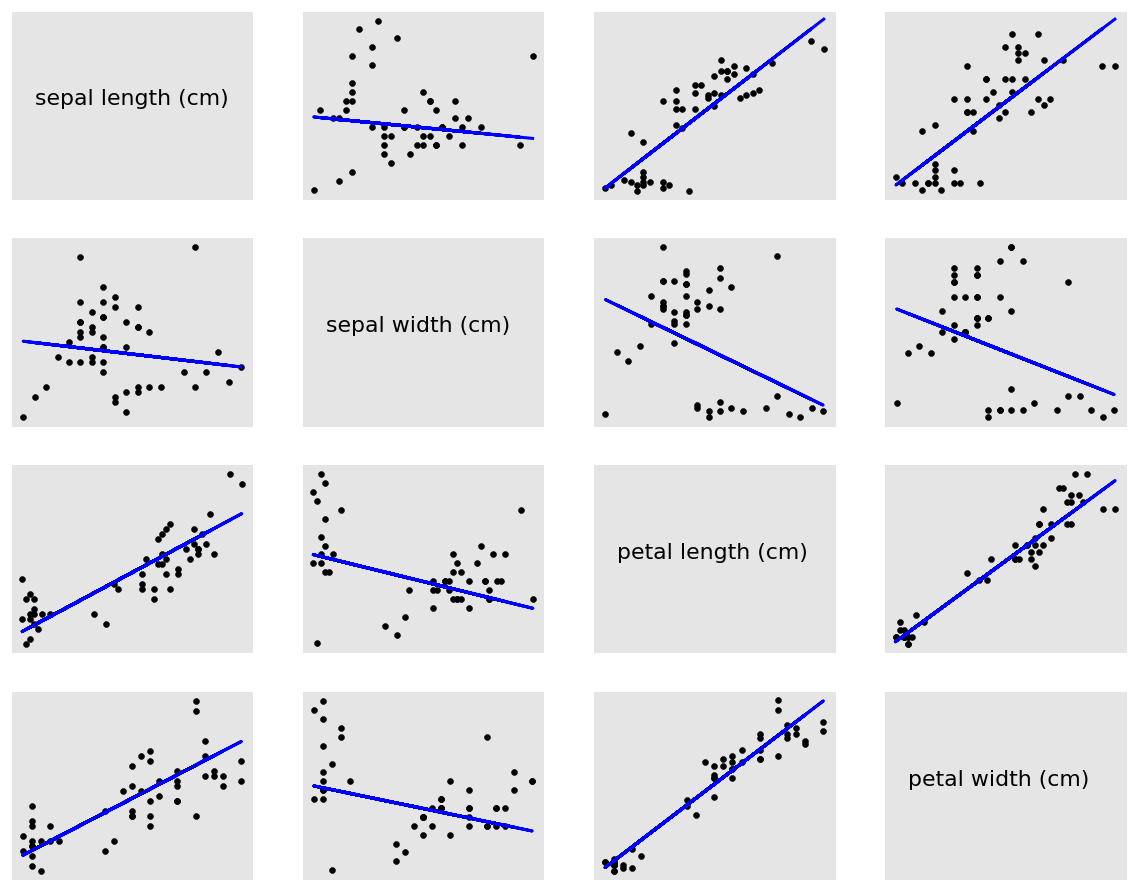

In [312]:
regression_plots(df)

##### 7. Run and save stats for each pairwise combination

In [313]:
# Stats for each plot

Stats = pd.DataFrame(index=[], columns=['Name', 'Coef', 'MSE', 'Variance'])

for i in range (0, 12):
    print(PrintNames[i] + '\n')
    print('Coefficients: ', Regr[i].coef_)
    print('Mean squared error: %.2f' % np.mean((Preds[i] - Ys[i]) ** 2))
    print('Variance score: %.2f' % regr_slsw.score(Xs[i], Ys[i]) + '\n\n')
    Stats.loc[i] = [PrintNames[i], Regr[i].coef_, np.mean((Preds[i] - Ys[i]) ** 2), regr_slsw.score(Xs[i], Ys[i])]

Sepal Length, Sepal Width

Coefficients:  [-0.07094391]
Mean squared error: 0.18
Variance score: -0.06


Sepal Length, Petal Length

Coefficients:  [ 1.82941176]
Mean squared error: 0.87
Variance score: -0.30


Sepal Length, Petal Width

Coefficients:  [ 0.7493844]
Mean squared error: 0.24
Variance score: -5.49


Sepal Width, Sepal Length

Coefficients:  [-0.27042671]
Mean squared error: 0.59
Variance score: -12.38


Sepal Width, Petal Length

Coefficients:  [-1.78754869]
Mean squared error: 2.66
Variance score: -0.13


Sepal Width, Petal Width

Coefficients:  [-0.63719228]
Mean squared error: 0.52
Variance score: -6.63


Petal Length, Sepal Length

Coefficients:  [ 0.42799078]
Mean squared error: 0.18
Variance score: -13.18


Petal Length, Sepal Width

Coefficients:  [-0.10971004]
Mean squared error: 0.16
Variance score: 0.14


Petal Length, Petal Width

Coefficients:  [ 0.41416501]
Mean squared error: 0.04
Variance score: -6.63


Petal Width, Sepal Length

Coefficients:  [ 0.94599145

##### 8. Plot the best overall linear regression model with accompanying stats

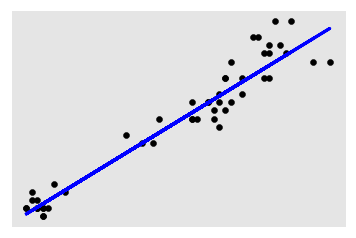

Name        Petal Length, Petal Width
Coef                 [0.414165013122]
MSE                         0.0409722
Variance                     -6.63298
Name: 8, dtype: object

In [318]:
pl.scatter(Xs[8], Ys[8],  color='black')
pl.plot(Xs[8], Preds[8], color='blue', linewidth=3)
pl.xticks([]), pl.yticks([])
pl.show()
Stats.loc[8]

##### 9. Find out what pairwise features yield the lowest MSE

In [319]:
Stats.nsmallest(10, 'MSE')

,Name,Coef,MSE,Variance
8,"Petal Length, Petal Width",[0.414165013122],0.040972,-6.632979
7,"Petal Length, Sepal Width",[-0.109710042885],0.157437,0.135393
10,"Petal Width, Sepal Width",[-0.211017571126],0.161539,-0.232299
6,"Petal Length, Sepal Length",[0.42799078282],0.176515,-13.182717
0,"Sepal Length, Sepal Width",[-0.0709439124487],0.180948,-0.058522
11,"Petal Width, Petal Length",[2.23477097095],0.213952,-0.153925
2,"Sepal Length, Petal Width",[0.749384404925],0.238100,-5.493743
9,"Petal Width, Sepal Length",[0.945991451884],0.256836,-11.307468
5,"Sepal Width, Petal Width",[-0.637192276204],0.521146,-6.628844
3,"Sepal Width, Sepal Length",[-0.270426706853],0.590114,-12.376543


### 1. Based upon the linear models you generated, which pair of features appear to be most
### predictive for one another? Note that you can answer this question based upon the output
### provided for the linear models.

Petal Length and Petal Width are the pair of features most predictive of one another. In the linear regression plots you can see the strong correlation with the blue linear regression line. The stats support this but there are some unexpected changes when you swap the order of dependent and independent variable. Petal Length, Petal Width has the lowest mean square error. However, Petal Width, Petal Length's MSE is much higher and comes in rank 7 for low MSEs. Combined they are still the lowest pairwise set.

### 2. Suppose you tried to generate a classification model on this dataset, but only after removing
### the feature that you were best able to predict based upon other features. How would
### removing this feature affect the classification performance?

I think the classification would still perform well while removing Petal Length but it would be a significant loss. There are still many pairwise regressions that perform adequately at around the same order of magnitude, that don't use Petal Length. Petal Length, Petal Width was one order of magnitude better. Other pairwise regressions using Petal Length fall into the same order of magnitude as everything else. The next best pairwise performance, Sepal Width and Petal Width would have a combined error score of 0.201(pwsw) + 0.580(swpw) = 0.781 versus the 0.0523 + 0.286 = 0.338 using Petal Length.
                                                                ** These numbers do change with new executions of the code